In [51]:
import matplotlib.animation as animation
import pandas as pd
import matplotlib.pyplot as plt
import os
import imageio
from tqdm import tqdm

data_raw_scene = 100

  8%|▊         | 8/100 [01:48<20:52, 13.62s/it]


KeyboardInterrupt: 

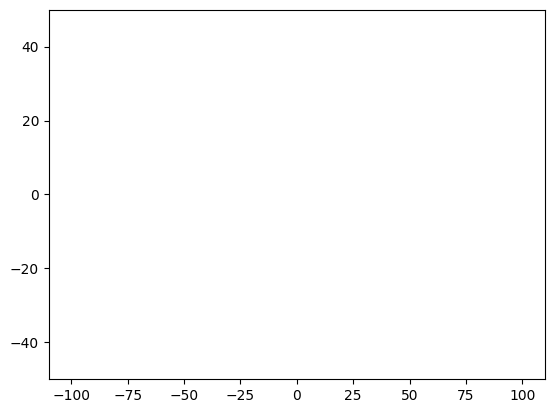

In [56]:
for num_scene in tqdm(range(0, data_raw_scene)):
    scene_lidar = pd.read_csv(f"data/processed data/lidar_data_{num_scene}.csv")
    # scene_radar = pd.read_csv(f"data/processed data/radar_data_{num_scene}.csv")
    # plt.patch.set_facecolor("grey")
    plt.xlim([-110, 110])
    plt.ylim([-50, 50])

    k = len(scene_lidar["r, (reflectance)"])
    zxcbtw = [((scene_lidar["r, (reflectance)"][i] / 255) ** 0.3 , 0,  1 - (scene_lidar["r, (reflectance)"][i] / 255) ** 0.3, 0.05) for i in range(k)]
    plt.scatter(scene_lidar["X, (m)"], scene_lidar["Y, (m)"], s=1, c=zxcbtw)
    # plt.scatter(scene_radar["X, (m)"], scene_radar["Y, (m)"], s=1, c="red")
    plt.title(f'Frame {num_scene}')
    plt.savefig(f'data/GIF/Frame_{num_scene}.png')
    plt.close()

with imageio.get_writer('Output.gif', mode='I', duration=0.5) as writer:
    for num_scene in range(data_raw_scene):
        image = imageio.imread(f'data/GIF/Frame_{num_scene}.png')
        writer.append_data(image)